# Install bitsandbytes

In [ ]:
!pip install git+https://github.com/huggingface/accelerate.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install bitsandbytes

  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-xdp185r6
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-xdp185r6
  Resolved https://github.com/huggingface/accelerate.git to commit d7c741a6bc575878ccafcbdc957cc8fcb5ba5c34
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.8

#  Install other dependencies

In [ ]:
!pip install -U transformers datasets peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.0/411.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: peft
    Found existing installation: peft 0.14.0
    Uninstalling peft-0.14.0:
      Successfully uninstalled peft-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==

# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Authenticate to HuggingFace

In [ ]:
from huggingface_hub import login

# A valid authenticated account in Hugging Face is needed.
login()


# Theory Brake [Meta LLaMA] (Large Language Model Meta AI)

LlaMA stands for Large Language Model Meta AI. It is a family of open-weight LLMs released by Facebook's AI research division, aimed at advancing research in the field of large-scale natural language processing.

Key points:

- LLaMA models are decoder-only transformers, similar in structure to GPT models (CLM-trained)
- The models are trained on a mixture of publiclt available datasets and aimed to be competitive with models like GPT-3 and PaLM, but with fewer parameters.
- LLaMA models are trained with a Casual Language Modeling (CLM) objective (predicting the next word/token given previous tokens).
- Meta released LLaMA in various sizes (7B, 13B, 33B, and 65B) with LLaMA 2 now being the second generation with improved performance and training efficiency.

Notable Featues:

- Pre-trained on 1.4 trillion tokens.
- Trained with grouped-query attention (GQA) to optomize inference speed.
- Open-weight model designed for research and commercial use (under license).
- Optomized for downstream tasks like question-answering, summarization, when it is fine-tuned.

# Download LLaMA 2 7B (from Meta)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig

# Load tokenizer + model
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)

bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_threshold=6.0,
    llm_int8_skip_modules=[],
    llm_int8_enable_fp32_cpu_offload=True
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    quantization_config=bnb_config,
    torch_dtype=torch.float16
)

# Adding patch pad token
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    model.resize_token_embeddings(len(tokenizer))

print("Model and tokenizer loaded successfully.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

Model and tokenizer loaded successfully.


# Load cleaned NLP Mental Health Conversation dataset

In [ ]:
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
# Adjust path to your dataset location
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/train_cleaned.csv")

# Checking the dataset columns
assert "Context" in df.columns and "Response" in df.columns, "Dataset must have 'Context' and 'Response' columns."


# Split dataset into Train/Val/Test (80/10/10)

In [ ]:
 train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


# Convert to Hugging Face Datasets

In [ ]:
dataset = DatasetDict({
    'train': Dataset.from_pandas(train_df),
    'validation': Dataset.from_pandas(val_df),
    'test': Dataset.from_pandas(test_df)
})


# Tokenization function with debugging prints

In [ ]:
def tokenize_function(examples):
    model_inputs = tokenizer(
        examples['Context'],
        padding="max_length",
        truncation=True,
        max_length=512
    )
    labels = tokenizer(
        examples['Response'],
        padding="max_length",
        truncation=True,
        max_length=512
    )
    model_inputs["labels"] = labels["input_ids"]

    # Debug print
    print("Sample Tokenization:")
    print("Context:", examples['Context'][0])
    print("Tokenized input_ids:", model_inputs["input_ids"][0])
    print("Tokenized labels:", model_inputs["labels"][0])

    return model_inputs

# Apply tokenization + inspect output

In [ ]:
# Apply Tokenization with Debugging
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Inspect tokenized dataset
print("Tokenized Dataset Example:", tokenized_datasets['train'][0])

Map:   0%|          | 0/2201 [00:00<?, ? examples/s]

Sample Tokenization:
Context: My ex-boyfriend and I have been back and forth for over a year now. He's in his late 20s, divorced for like five years now with two kids. He has a lot of narcissistic behaviors. He lies and cheats, but I love him. I've tried to date other people, but I always go back to him.
Tokenized input_ids: [1, 1619, 429, 29899, 19415, 18326, 322, 306, 505, 1063, 1250, 322, 11483, 363, 975, 263, 1629, 1286, 29889, 940, 29915, 29879, 297, 670, 5683, 29871, 29906, 29900, 29879, 29892, 25074, 1133, 363, 763, 5320, 2440, 1286, 411, 1023, 413, 4841, 29889, 940, 756, 263, 3287, 310, 302, 5666, 790, 4695, 4010, 18930, 29889, 940, 12185, 322, 923, 1446, 29892, 541, 306, 5360, 1075, 29889, 306, 29915, 345, 1898, 304, 2635, 916, 2305, 29892, 541, 306, 2337, 748, 1250, 304, 1075, 29889, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

Map:   0%|          | 0/275 [00:00<?, ? examples/s]

Sample Tokenization:
Context: Is it normal for people to cry during therapy, or is it just me?
Tokenized input_ids: [1, 1317, 372, 4226, 363, 2305, 304, 10901, 2645, 29220, 27580, 29892, 470, 338, 372, 925, 592, 29973, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

Map:   0%|          | 0/276 [00:00<?, ? examples/s]

Sample Tokenization:
Context: I'm having issues with my relative. The police never believe the experiences I have been through because I am only a kid. 
   I've even had trouble trying to reach a therapist because I said I wanted to get an adult to help me. Could you please give me advice?
Tokenized input_ids: [1, 306, 29915, 29885, 2534, 5626, 411, 590, 6198, 29889, 450, 10974, 2360, 4658, 278, 27482, 306, 505, 1063, 1549, 1363, 306, 626, 871, 263, 26397, 29889, 30081, 13, 259, 306, 29915, 345, 1584, 750, 7458, 1811, 304, 6159, 263, 29220, 481, 391, 1363, 306, 1497, 306, 5131, 304, 679, 385, 16157, 304, 1371, 592, 29889, 6527, 366, 3113, 2367, 592, 9848, 29973, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Save tokenized datasets for reuse

In [ ]:
# Save tokenized dataset for later use
tokenized_datasets.save_to_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/2201 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/276 [00:00<?, ? examples/s]

# Theory Brake [LoRA] (Low-Rank Adaptation)

LoRA is a fine-tuning technique introduced to make adapting large pre-trained models more memory efficient and faster.

Key concept:

- Instead of fine-tuning all parameters of a large model (which could be billions of weight like in LlaMA 7B), LoRA injects small trainable matrices (low-rank adapters) into certain layers usually attention layers).
- These small matrices are trained while keeping the original weights frozen.
- After tuning, these adapters can be "merged" back into the original model, allowing for efficient use during inference.

Benefits:

- Massive reduction in trainable parameters.
- Faster training.
- Requires much less GPU memory.
- Enables training even on consumer-grade GPUs like A100, T4s, or L4s.

How LoRA Works:

- In standard transformer layers:

LoRA modifies weights in the attention (or feedforward) layers by decomposing them into two smaller matrices:

- Original weight:
𝑊

- LoRA update: 𝑊 + Δ𝑊

Δ
𝑊
=
𝐴
×
𝐵

where
𝐴
 and
𝐵
 are the low-rank matrices being trained.

# Theory Brake [CLM] (Causal Language Modeling)

Causal Language Modeling is the training objective used for LLaMA, GPT, and other decoder-only architectures.

How CLM works:

The model is trained left-to-right to predict the next token in a sequence.

Unlike Masked Language Modeling (MLM) (used in models like BERT), CLM does not mask tokens but instead focuses on natural autoregressive generation.

Equation:

 P(w
1
​
 ,w
2
​
 ,...,w
n
​
 )=
t=1
∏
n
​
 P(w
t
​
 ∣w
<t
​
 )

Common use cases:

- Open-ended text generation.
- Dialogue/chatbots.
- Story writing, summarization, and more.

On this  project:

LLaMA 2 (Meta) is the LLM, trained with a CLM objective.
LoRA is applied  to fine-tune LLaMA 2 on the NLP Mental Health Conversation  dataset with very few additional parameters.
This allows to specialize the model for the mental health assistant task, without the overhead of full fine-tuning.


#Theory Brake [MHSA] (Multi-Head-Self-Attention)

In the self-attention mechanism (core to transformers like LLaMA, GPT, etc.), these projection layers help transform input representations into the components needed for attention computations:

1. q_proj (Query Projection)

It creates the Query (Q) matrix by projecting the input hidden states.
Each position in the input sequence generates a query vector.
The query represents "what information this position is looking for" in other positions.

2. k_proj (Key Projection)

It generates the Key (K) matrix from the same input.
The key represents "how much information this position contains" for other queries.
Used to compute attention scores via dot-product with the query.

3. v_proj (Value Projection)

It generates the Value (V) matrix.
Values hold the actual data or information passed through the network once attention scores are computed.

4. o_proj (Output Projection)

After calculating the attention output (using Q, K, V), this output is passed through the o_proj (output projection) layer.
The purpose is to transform the result back into the hidden space dimension before passing it to the next transformer block.

In [ ]:
import torch
from transformers import LlamaForCausalLM, AutoTokenizer, Trainer, TrainingArguments, EarlyStoppingCallback, TrainerCallback
from datasets import load_from_disk

# STEP 1: Load tokenizer and model in FP32 (no quantization)
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float32,
    device_map="auto"
)

# Add pad token if missing
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    model.resize_token_embeddings(len(tokenizer))

print("Model and tokenizer loaded.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model and tokenizer loaded.


In [ ]:
# STEP 2: Unfreeze specific layers for fine-tuning
for name, param in model.named_parameters():
    if param.dtype in [torch.float32]:
        if (
            any(f"layers.{i}" in name for i in range(29, 31)) or  # Unfreeze layers 29 and 30 (zero-indexed)
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

# Print trainable % for verification
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
total = sum(p.numel() for p in model.parameters())
print(f"Trainable params: {trainable} || All params: {total} || Trainable%: {100 * trainable / total:.4f}")


Trainable params: 536088576 || All params: 6738415616 || Trainable%: 7.9557


In [ ]:
# STEP 3: Load tokenized dataset
tokenized_datasets = load_from_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset")

In [ ]:
# STEP 4: Custom callback for printing loss
class LossPrinterCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None and "loss" in logs:
            step = state.global_step
            train_loss = logs.get("loss", "N/A")
            val_loss = logs.get("eval_loss", "N/A")
            print(f"Step {step}: Training Loss = {train_loss} | Validation Loss = {val_loss}")

In [ ]:
# STEP 5: Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_fullfine_checkpoints",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    learning_rate=5e-5,
    max_steps=6000,
    save_strategy="steps",
    save_steps=500,
    eval_strategy="steps",
    eval_steps=100,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="none",
    fp16=False,
    label_names=["labels"],
)

In [ ]:
# STEP 6: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    callbacks=[
        EarlyStoppingCallback(early_stopping_patience=5),
        LossPrinterCallback()
    ]
)



In [ ]:
# STEP 7: Train!
trainer.train()

Step,Training Loss,Validation Loss
100,3.230400,3.714117
200,2.739700,3.739257
300,3.332200,3.681194
400,3.011200,3.594220
500,3.322700,3.519331
600,3.140000,3.572340
700,3.713900,3.497629
800,3.541900,3.557497
900,3.112700,3.534130
1000,3.289300,3.487057


Step 10: Training Loss = 10.2038 | Validation Loss = N/A
Step 20: Training Loss = 3.8882 | Validation Loss = N/A
Step 30: Training Loss = 4.0579 | Validation Loss = N/A
Step 40: Training Loss = 3.3482 | Validation Loss = N/A
Step 50: Training Loss = 3.7034 | Validation Loss = N/A
Step 60: Training Loss = 3.3001 | Validation Loss = N/A
Step 70: Training Loss = 3.699 | Validation Loss = N/A
Step 80: Training Loss = 3.5485 | Validation Loss = N/A
Step 90: Training Loss = 3.8407 | Validation Loss = N/A
Step 100: Training Loss = 3.2304 | Validation Loss = N/A
Step 110: Training Loss = 3.2421 | Validation Loss = N/A
Step 120: Training Loss = 3.5518 | Validation Loss = N/A
Step 130: Training Loss = 3.8118 | Validation Loss = N/A
Step 140: Training Loss = 3.7176 | Validation Loss = N/A
Step 150: Training Loss = 3.3626 | Validation Loss = N/A
Step 160: Training Loss = 3.2072 | Validation Loss = N/A
Step 170: Training Loss = 3.2199 | Validation Loss = N/A
Step 180: Training Loss = 3.6773 | Valid

TrainOutput(global_step=1500, training_loss=3.383580926259359, metrics={'train_runtime': 7378.8211, 'train_samples_per_second': 3.253, 'train_steps_per_second': 0.813, 'total_flos': 1.2166477097258189e+17, 'train_loss': 3.383580926259359, 'epoch': 2.7233075874602455})

In [ ]:
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, LlamaForCausalLM
from datasets import load_from_disk
import torch

# STEP 1: Reload tokenizer + model in fp32
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,  # Switching to bf16 to save VRAM
    device_map="auto"
)

# STEP 2: Unfreeze selective layers (layers 24-31, norms, lm_head)
for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16]:
        if (
            any(f"layers.{i}" in name for i in range(31, 23, -1)) or
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

# STEP 3: Load dataset
tokenized_datasets = load_from_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset")

# STEP 4: Training Arguments (no early stopping)
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_fullfine_checkpoints-noearlystopping",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    learning_rate=5e-5,
    max_steps=6000,  # or as much as you want
    save_strategy="steps",
    save_steps=500,
    eval_strategy="steps",
    eval_steps=100,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
)

# STEP 5: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"]
)

# STEP 6: Resume Training
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carolinaleal1895 (carolinaleal1895-university-of-san-diego) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
100,3.202300,3.678601
200,2.725200,3.691644
300,3.310200,3.541984
400,2.958200,3.691162
500,3.300000,3.489621
600,3.170600,3.563261
700,3.663800,3.474053
800,3.491800,3.508471
900,3.068300,3.475582
1000,3.240200,3.453957


TrainOutput(global_step=6000, training_loss=2.856963985443115, metrics={'train_runtime': 5222.8839, 'train_samples_per_second': 4.595, 'train_steps_per_second': 1.149, 'total_flos': 4.8653729733279744e+17, 'train_loss': 2.856963985443115, 'epoch': 10.8905043162199})

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM

# STEP 1: Define paths
base_model_id = "meta-llama/Llama-2-7b-hf"  # original tokenizer location
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_fullfine_checkpoints-noearlystopping/checkpoint-6000"

# STEP 2: Load tokenizer and fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

model = LlamaForCausalLM.from_pretrained(checkpoint_dir)
model.resize_token_embeddings(len(tokenizer))
model.eval()
model.to("cuda")

# STEP 3: Chat function
def generate_response(user_input):
    system_prompt = "You are a helpful AI assistant for emotional support."
    prompt = f"[INST] {system_prompt} User: {user_input} [/INST]"

    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=100,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )
    decoded = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return decoded[0]

# Example usage
response = generate_response("I feel anxious about my work presentation tomorrow.")
print("Generated Response:", response)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Generated Response: [INST] You are a helpful AI assistant for emotional support. User: I feel anxious about my work presentation tomorrow. [/INST] how you!ll you are and your that a time anx for can  you' for your you It withs anx youll you' you're youll you your's you your you anx toll time your time time thatll for It you you It anxious It anxiouss time you' to It a It a It time be time with you' It for It It


In [ ]:
# Hybrid: Full fine-tune (layers 20-31) + LoRA on q_proj & v_proj
from transformers import Trainer, TrainingArguments, AutoTokenizer, LlamaForCausalLM
from datasets import load_from_disk
import torch
from peft import get_peft_model, LoraConfig

# STEP 1: Reload tokenizer + model
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,  # A100 ready
    device_map="auto"
)
model.resize_token_embeddings(len(tokenizer))

model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

# STEP 2: Unfreeze layers 20-31 + norms + lm_head
for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if (
            any(f"layers.{i}" in name for i in range(31, 19, -1)) or
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

# STEP 3: Add LoRA adapters
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# STEP 4: Load dataset
tokenized_datasets = load_from_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset")

# STEP 5: Training Arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers20-31_lora",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    warmup_steps=1000,
    max_steps=12000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    eval_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

# STEP 6: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"]
)

# STEP 7: Start training
trainer.train()



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 8,388,608 || all params: 6,746,804,224 || trainable%: 0.1243


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carolinaleal1895 (carolinaleal1895-university-of-san-diego) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
500,4.744200,4.859125
1000,3.262300,3.574823
1500,3.440200,3.527927
2000,3.294800,3.489968
2500,3.446300,3.474515
3000,3.475800,3.469975
3500,3.573600,3.457394
4000,3.598200,3.458719
4500,3.366700,3.463787
5000,3.038800,3.517294


TrainOutput(global_step=12000, training_loss=4.118139693895976, metrics={'train_runtime': 16170.2234, 'train_samples_per_second': 5.937, 'train_steps_per_second': 0.742, 'total_flos': 1.9449414392972575e+18, 'train_loss': 4.118139693895976, 'epoch': 43.479564032697546})

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# STEP 1: Load tokenizer
base_model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# STEP 2: Load base model (hybrid fine-tuned)
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,  # bf16 for A100
    device_map="auto"
)

# STEP 3: Load LoRA adapter from your new checkpoint
lora_checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers20-31_lora/checkpoint-12000"
model = PeftModel.from_pretrained(base_model, lora_checkpoint_path)
model.eval()

# STEP 4: Chat function
def chat():
    print("🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)\n")
    while True:
        user_input = input("User: ")
        if user_input.lower() == "exit":
            break

        system_prompt = "You are a helpful AI assistant for emotional support."
        prompt = f"{system_prompt}\nUser: {user_input}\nAssistant:"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=150,
                do_sample=True,
                temperature=0.9,
                top_p=0.95,
                repetition_penalty=1.1,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.pad_token_id
            )

        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = decoded.split("Assistant:")[-1].strip()
        print(f"Assistant: {response}\n")

# STEP 5: Run the chat
chat()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)

User: Hello
Assistant: the, in. that are

User: How are you ?
Assistant: are  to iting the and   to of as how a is' to is this for you a have and- you you

User: I feel bad
Assistant: are, your and it for is you to it can of is

User: exit


In [ ]:
# Hybrid inference script with decoding tweaks
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# STEP 1: Load tokenizer
base_model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# STEP 2: Load base model
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# STEP 3: Load LoRA adapter
lora_checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers20-31_lora/checkpoint-12000"
model = PeftModel.from_pretrained(base_model, lora_checkpoint_path)
model.eval()

# STEP 4: Chat function with improved decoding
def chat():
    print("🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)\n")
    while True:
        user_input = input("User: ")
        if user_input.lower() == "exit":
            break

        system_prompt = "You are a helpful AI assistant for emotional support."
        prompt = f"{system_prompt}\nUser: {user_input}\n"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=200,
                do_sample=True,
                temperature=1.0,
                top_p=0.92,
                top_k=50,
                repetition_penalty=1.3,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.pad_token_id
            )

        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = decoded.split("User:")[-1].strip()
        print(f"Assistant: {response}\n")

# STEP 5: Run the chat
chat()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)

User: Hello
Assistant: Hello
 as you your I and

User: I feel bad
Assistant: I feel bad
, to and of not  to you

User: why not to me ?
Assistant: why not to me ?
 your of    that

User: exit


In [ ]:
# Hybrid: Full fine-tune (layers 12-31) + LoRA with manual device dispatch
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import get_peft_model, LoraConfig
from datasets import load_from_disk
from transformers import Trainer, TrainingArguments
from accelerate import dispatch_model, infer_auto_device_map

# STEP 1: Reload tokenizer + model
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map=None  # Disable auto-sharding for manual dispatch
)
model.resize_token_embeddings(len(tokenizer))

model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

# STEP 2: Unfreeze layers 12-31 + norms + lm_head
for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if (
            any(f"layers.{i}" in name for i in range(31, 11, -1)) or
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

# STEP 3: Add LoRA adapters
lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# STEP 4: Manual device map + dispatch
device_map = infer_auto_device_map(
    model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
model = dispatch_model(model, device_map=device_map)

# STEP 5: Load dataset
tokenized_datasets = load_from_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset")

# STEP 6: Training Arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=1000,
    max_steps=20000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    eval_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

# STEP 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"]
)

# STEP 8: Start training
trainer.train()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 16,777,216 || all params: 6,755,192,832 || trainable%: 0.2484


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carolinaleal1895 (carolinaleal1895-university-of-san-diego) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
500,4.112600,4.207610
1000,3.223400,3.541606
1500,3.423600,3.509300
2000,3.265300,3.470572
2500,3.424900,3.462972
3000,3.438900,3.467455
3500,3.570500,3.454872
4000,3.554000,3.448956
4500,3.331200,3.506179
5000,2.999800,3.600159


Step,Training Loss,Validation Loss
500,4.112600,4.207610
1000,3.223400,3.541606
1500,3.423600,3.509300
2000,3.265300,3.470572
2500,3.424900,3.462972
3000,3.438900,3.467455
3500,3.570500,3.454872
4000,3.554000,3.448956
4500,3.331200,3.506179
5000,2.999800,3.600159


TrainOutput(global_step=20000, training_loss=3.5702175638198854, metrics={'train_runtime': 38049.1392, 'train_samples_per_second': 4.205, 'train_steps_per_second': 0.526, 'total_flos': 3.2456318245499044e+18, 'train_loss': 3.5702175638198854, 'epoch': 72.46524307133122})

In [ ]:
# Updated inference script for latest hybrid model
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# STEP 1: Load tokenizer
base_model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# STEP 2: Load base model
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# STEP 3: Load LoRA adapter from latest checkpoint
lora_checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora/checkpoint-20000"
model = PeftModel.from_pretrained(base_model, lora_checkpoint_path)
model.eval()

# STEP 4: Chat function with decoding tweaks
def chat():
    print("🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)\n")
    while True:
        user_input = input("User: ")
        if user_input.lower() == "exit":
            break

        system_prompt = "You are a helpful AI assistant for emotional support."
        prompt = f"{system_prompt}\nUser: {user_input}\n"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=200,
                do_sample=True,
                temperature=0.95,
                top_p=0.92,
                top_k=40,
                repetition_penalty=1.3,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.pad_token_id
            )

        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = decoded.split("User:")[-1].strip()
        print(f"Assistant: {response}\n")

# STEP 5: Run the chat
chat()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)

User: Hello
Assistant: Hello
     you

User: I feel happy
Assistant: I feel happy
 you to will

User: I fell nervous
Assistant: I fell nervous
 the you your as can like that  is

User: I am depressed because of the incoming exam
Assistant: I am depressed because of the incoming exam
 that with, or and insaping

User: exit


In [ ]:
# Enhanced inference decoding for better conversational flow
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# STEP 1: Load tokenizer
base_model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# STEP 2: Load base model
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# STEP 3: Load LoRA adapter
lora_checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora/checkpoint-20000"
model = PeftModel.from_pretrained(base_model, lora_checkpoint_path)
model.eval()

# STEP 4: Chat function with more diverse decoding
def chat():
    print("🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)\n")
    while True:
        user_input = input("User: ")
        if user_input.lower() == "exit":
            break

        system_prompt = "You are a kind and empathetic AI therapist. Engage in emotional conversations."
        prompt = f"{system_prompt}\nUser: {user_input}\n"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=200,
                do_sample=True,
                temperature=1.1,
                top_p=0.9,
                top_k=30,
                repetition_penalty=1.4,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.pad_token_id
            )

        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = decoded.split("User:")[-1].strip()
        print(f"Assistant: {response}\n")

# STEP 5: Run the chat
chat()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)

User: I am happy because it is my birthday
Assistant: I am happy because it is my birthday
 for, your to you have can of the with would an on may

User: I am nervous because of an incoming exam
Assistant: I am nervous because of an incoming exam
t thating

User: exit


In [ ]:
# Inference script with 'Therapist:' role injection
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# STEP 1: Load tokenizer
base_model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# STEP 2: Load base model
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# STEP 3: Load LoRA adapter
lora_checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora/checkpoint-20000"
model = PeftModel.from_pretrained(base_model, lora_checkpoint_path)
model.eval()

# STEP 4: Chat function with Therapist prefix
def chat():
    print("🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)\n")
    while True:
        user_input = input("User: ")
        if user_input.lower() == "exit":
            break

        system_prompt = "You are a kind and empathetic AI therapist. When the user shares a feeling, you provide support or advice."
        prompt = f"{system_prompt}\nUser: {user_input}\nTherapist:"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=200,
                do_sample=True,
                temperature=1.1,
                top_p=0.9,
                top_k=30,
                repetition_penalty=1.4,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.pad_token_id
            )

        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = decoded.split("Therapist:")[-1].strip()
        print(f"Assistant: {response}\n")

# STEP 5: Run the chat
chat()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🤖 LLaMA2 Hybrid Assistant (type 'exit' to quit)

User: I am stressed because of my new job
Assistant: what be will for that? it on with can to is have as help

User: this new job is a challenge 
Assistant: how  be of

User: exit


# Therapeutically Structured Chat Data Cleaning for Conversational AI.

In this preprocessing step, we structure raw conversational data into a format that mimics therapeutic dialogues, an approach inspired by evidence-based counseling communication frameworks. The original dataset, consisting of pairs of user inputs ("Context") and therapist responses ("Response"), is transformed into a consolidated text format using special tokens (<|user|> and <|therapist|>) to clearly demarcate speaker turns.

This format promotes the alignment of AI response generation with the turn-taking and reflective communication styles found in real-world therapeutic settings. According to O'Connell and Dowling (2014), effective therapeutic conversations are characterized by active listening, structured empathy, and collaborative engagement—principles that this formatting aims to preserve. By explicitly marking the user and therapist segments, we create a consistent and interpretable structure that facilitates supervised training of large language models, especially for mental health support contexts.

The cleaned dataset is then split into training (80%), validation (10%), and testing (10%) subsets to support model development and evaluation. This foundational formatting step lays the groundwork for further personalization, intent detection, and safety filtering layers introduced in later iterations.

Reference: O'Connell, B., & Dowling, E. (2014). The therapeutic use of self in counselling and psychotherapy. Routledge. https://core.ac.uk/download/pdf/162674606.pdf

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Load the previous cleaned train dataset CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/train_cleaned.csv')

# Apply the therapeutic chat formatting
def format_chat(row):
    user_prompt = f"<|user|> {row['Context'].strip()}"
    therapist_response = f"<|therapist|> {row['Response'].strip()}"
    full_text = user_prompt + '\n' + therapist_response
    return full_text

# Apply formatting to dataset
df['formatted_text'] = df.apply(format_chat, axis=1)

# Split dataset into train/val/test (80/10/10 split)
train_df = df.sample(frac=0.8, random_state=42)
temp_df = df.drop(train_df.index)
val_df = temp_df.sample(frac=0.5, random_state=42)
test_df = temp_df.drop(val_df.index)

# Convert to Hugging Face DatasetDict
train_ds = Dataset.from_pandas(train_df[['formatted_text']])
val_ds = Dataset.from_pandas(val_df[['formatted_text']])
test_ds = Dataset.from_pandas(test_df[['formatted_text']])

final_dataset = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})

# Save before tokenization for verification
final_dataset.save_to_disk('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset')

print(" Dataset formatting complete! Ready to verify.")


Saving the dataset (0/1 shards):   0%|          | 0/2202 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

 Dataset formatting complete! Ready to verify.


## The below process is optional and it is only meant for checking the data distribution and format

In [ ]:
from datasets import load_from_disk

# Load the formatted chat dataset
formatted_dataset = load_from_disk('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset')

# Print dataset structure
print(formatted_dataset)

# Inspect a few samples from each split
for split in ['train', 'validation', 'test']:
    print(f"\n--- Sample from {split} set ---")
    print(formatted_dataset[split][0])
    print(f"\nTotal samples in {split}: {len(formatted_dataset[split])}")

# Optional deeper inspection (loop through more samples if needed)
print("\n--- First 3 samples from train set ---")
for i in range(3):
    print(f"Sample {i+1}: {formatted_dataset['train'][i]['formatted_text']}")
    print('-'*80)


DatasetDict({
    train: Dataset({
        features: ['formatted_text', '__index_level_0__'],
        num_rows: 2202
    })
    validation: Dataset({
        features: ['formatted_text', '__index_level_0__'],
        num_rows: 275
    })
    test: Dataset({
        features: ['formatted_text', '__index_level_0__'],
        num_rows: 275
    })
})

--- Sample from train set ---
{'formatted_text': '<|user|> My mother takes care of niece whom my sister abandoned. She calls me every day complaining, but I don\'t want to hear it anymore.\n<|therapist|> It is difficult to implement healthy boundaries when the person is a parent or family member. I would encourage you to identify how it makes you feel after talking with your mother. Work on establishing healthy boundaries where you do not feel obligated to engage the complaining daily. Maybe setting a time limit to talk with your mother and practicing how to be assertive and not disrespect or aggressive. Helping your mother understand how you

# First Training with full LLaMA and LoRA applied on Therapeutical Structured Chat Data cleaning

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_from_disk, DatasetDict
from peft import get_peft_model, LoraConfig
from accelerate import dispatch_model, infer_auto_device_map

# Load tokenizer + add special tokens
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
special_tokens_dict = {'additional_special_tokens': ['<|user|>', '<|therapist|>']}
tokenizer.add_special_tokens(special_tokens_dict)

tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load base model
model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map=None  # Manually dispatch after LoRA setup
)
model.resize_token_embeddings(len(tokenizer))

model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

# SSelect layers 12-31 for full fine-tune + LoRA adapters
for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if (
            any(f"layers.{i}" in name for i in range(31, 11, -1)) or
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Manual device map + dispatch model
device_map = infer_auto_device_map(
    model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
model = dispatch_model(model, device_map=device_map)

# Load formatted dataset (not tokenized yet)
formatted_dataset = load_from_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset")

# Tokenize + mask padding tokens
def tokenize_function(examples):
    model_inputs = tokenizer(
        examples["formatted_text"],
        max_length=2048,
        truncation=True,
        padding=True
    )
    labels = model_inputs["input_ids"].copy()
    labels = [
        [(token if token != tokenizer.pad_token_id else -100) for token in label_seq]
        for label_seq in labels
    ]
    model_inputs["labels"] = labels
    return model_inputs

tokenized_datasets = formatted_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['formatted_text', '__index_level_0__']
)

# Save tokenized dataset for future use
tokenized_datasets.save_to_disk("/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v4")

# SData collator (causal LM)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Training Arguments (no early stopping)
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v2",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=5e-6,
    warmup_steps=500,
    max_steps=6000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
)

# Start training
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


trainable params: 16,777,216 || all params: 6,755,209,216 || trainable%: 0.2484


Map:   0%|          | 0/2202 [00:00<?, ? examples/s]

Map:   0%|          | 0/275 [00:00<?, ? examples/s]

Map:   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2202 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carolinaleal1895 (carolinaleal1895-university-of-san-diego) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
500,2.958400,2.927828
1000,2.258100,2.177585
1500,2.080600,2.106556
2000,2.055400,2.086519
2500,2.055500,2.073121
3000,2.030200,2.061997
3500,2.045300,2.051805


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


# First Inference test with full LLaMA and LoRA applied on Therapeutical Structured Chat Data cleaning

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# Define paths
model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v2/checkpoint-3000"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.padding_side = "left"
tokenizer.add_special_tokens({
    'additional_special_tokens': ['<|user|>', '<|therapist|>']
})
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load base model
base_model = LlamaForCausalLM.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto")
base_model.resize_token_embeddings(len(tokenizer))

# Load LoRA adapter
model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model = model.merge_and_unload()  # optional: merge LoRA into base for faster inference
model.eval()

# Chat loop
while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    prompt = f"<|user|> {user_input}\n<|therapist|>"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=300,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
            pad_token_id=tokenizer.pad_token_id
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = response.split("<|therapist|>")[-1].strip()
    print(f"Therapist: {response}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

User: I feel sad
Therapist: I feel sad
   I'm in a depression.
    How can I get out of it?
цій 2006 study that showed that there is no such thing as a depression.  Depression is a clinical term that describes the way a person is feeling, not an actual thing.  Depression is just a term used to describe how a person is feeling.  You are feeling sad and that is how you feel.  Depression is not a medical condition that can be diagnosed and treated.  A therapist can help you to learn how to cope with the sad feelings, but there is no cure for depression.  There is no pill you can take to make it go away.  You can learn to live with it and to cope with it.  You can learn to accept and live with the sadness.  You can learn to understand that you cannot control the way you feel.  You can learn that it is okay to feel sad.  You can learn to accept the sad feelings and to live with them.  You can learn to love yourself even though you feel sad.  You can learn to accept that you are a human bein

# Second Inference test with full LLaMA and LoRA applied on Therapeutical Structured Chat Data cleaning

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# Load tokenizer & model
model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v2/checkpoint-3000"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.padding_side = "left"
tokenizer.add_special_tokens({
    'additional_special_tokens': ['<|user|>', '<|therapist|>']
})
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

base_model = LlamaForCausalLM.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto")
base_model.resize_token_embeddings(len(tokenizer))
model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model = model.merge_and_unload()
model.eval()

# Helper to clean output
def clean_output(generated_text):
    if "<|therapist|>" in generated_text:
        response = generated_text.split("<|therapist|>")[-1]
    else:
        response = generated_text
    # Stop if it generates the next user tag by mistake
    response = response.split("<|user|>")[0]
    return response.strip()

# Chat loop
chat_history = []
while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    chat_history.append(f"<|user|> {user_input}")
    prompt = "\n".join(chat_history) + "\n<|therapist|>"

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=150,
            do_sample=True,
            top_p=0.92,
            temperature=0.5,
            repetition_penalty=1.2,
            pad_token_id=tokenizer.pad_token_id
        )
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    therapist_reply = clean_output(decoded)

    print(f"Therapist: {therapist_reply}\n")
    chat_history.append(f"<|therapist|> {therapist_reply}")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

User: Can you help me out with my depression ?
Therapist: Can you help me out with my depression ?
  Dealing with your own depression is a process that takes time and patience.  If it's something that has been going on for some time, I would recommend talking to someone about what you are experiencing so they can give you the right advice. The first step in dealing with any kind of mental illness or disorder is recognizing there may be an issue at hand.  If this sounds like you, then start by getting professional assistance from a therapist who specializes in treating people with mood disorders such as anxiety and/or depression.  Therapy will not only teach you how best deal with these issues but also provide support during times when things get tough (which they

User: can you give me any guidance >
Therapist: Can you help me out with my depression ?
  Can you help me out with my depression ?
  Dealing with your own depression is a process that takes time and patience.  If it's someth

# Third Inference test with full LLaMA and LoRA applied on Therapeutical Structured Chat Data cleaning

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# Load tokenizer and add special tokens
model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v2/checkpoint-3000"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.padding_side = "left"

special_tokens_dict = {'additional_special_tokens': ['<|user|>', '<|therapist|>']}
tokenizer.add_special_tokens(special_tokens_dict)

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load base model
base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# Ensure embedding table matches saved checkpoint
base_model.resize_token_embeddings(len(tokenizer))

# Load LoRA adapter on top
model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model.eval()

# Inference loop
def clean_response(text):
    text = text.split("<|therapist|>")[-1]
    text = text.split("<|user|>")[0]
    return text.strip()

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    prompt = f"<|user|> {user_input}\n<|therapist|>"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,
            top_p=0.8,
            temperature=0.5,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
            repetition_penalty=1.2,
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = clean_response(response)
    print(f"Therapist: {response}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

User: I am nervous because of my upcoming exam
Therapist: I am nervous because of my upcoming exam
  It is completely normal to feel anxious about an important event.  If you are feeling overwhelmed by the anxiety, then it may be helpful for you to talk with someone who can help you manage your stress and give you some strategies on how to handle this situation in a healthy way.  If you have never talked with anyone before or if you don't know where to start looking, consider talking with a school counselor at your high school. They will likely

User: I want to talk with you instead 
Therapist: I want to talk with you instead 
  This is a great question. It's important for us as counselors and therapists to be clear about our intentions when we work together, so that both of us know what the purpose or goal of treatment will be. I would encourage you to ask your therapist if they are comfortable working towards specific goals during sessions (for example: decreasing anxiety symptoms). 

# Hybrid Therapeutic-Advisor Chat Dataset Cleaning and Enrichment (v4 → v5)

This cleaning and formatting pipeline represents a significant enhancement over the initial therapeutic formatting. It applies a multi-stage approach to refine chatbot-ready conversational data, introducing structured language, bilingual detection, response-type classification, and tone-specific enrichment. These steps are designed to better align AI responses with real-world therapeutic and advisory dialogue expectations.

- **Structure and Polish Text**

The original user and therapist responses were reformatted using special tokens (<|user|> and <|therapist|advisor|>) to clearly segment speaker roles in the conversation. This structure supports consistent tokenization and model training. Then, extraneous whitespace and formatting inconsistencies were normalized to ensure clean input sequences for both training and inference.

- **Bilingual Content Detection**

Building on the importance of contextual sensitivity in multilingual populations (O’Connell & Dowling, 2014), the dataset was scanned for Spanish keywords. Entries that contain a mix of English and Spanish are flagged using a simple keyword-matching approach. These flagged entries can be used later for specialized language-aware modeling or data augmentation.

- **Tone Classification – Therapist vs. Advisor**

Each response was classified as either therapist or advisor using a rule-based heuristic. Responses containing directive, action-oriented phrases (e.g., “try this”, “next steps”, “you can start by…”) were tagged as advisor, while others were kept as therapist. This distinction reflects the real-world dichotomy between empathetic, non-directive counseling and goal-driven guidance often found in coaching or advisory sessions.

- **Advisory Enrichment with Templates**

To maintain engagement and clarity in goal-oriented replies, additional advisory templates were programmatically injected into advisor-type messages. These included supportive prompts like:

“Here are 3 steps you could try today.”

“Let’s break it down into an actionable plan.”

By expanding the language style variety, the dataset supports fine-tuning models that generate richer and more structured advisory responses while preserving therapeutic tone where needed.

In [ ]:
import pandas as pd

# Load your cleaned dataset
input_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/train_cleaned.csv'
df = pd.read_csv(input_path)

# Remove extra whitespace
df['Context'] = df['Context'].str.strip()
df['Response'] = df['Response'].str.strip()

# Create formatted text column
def format_row(row):
    return f"<|user|> {row['Context']}\n<|therapist|advisor|> {row['Response']}"

df['formatted_text'] = df.apply(format_row, axis=1)

# Save as CSV or HuggingFace-ready JSONL later
output_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4.csv'
df[['formatted_text']].to_csv(output_path, index=False)

print(" Step 1 complete! Dataset reformatted and saved to:", output_path)


 Step 1 complete! Dataset reformatted and saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4.csv


In [ ]:
# Optional: show 3 random samples
print(df[['formatted_text']].sample(3).to_string(index=False))

In [ ]:
import pandas as pd
import re

# Load the previously formatted CSV
input_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4.csv'
df = pd.read_csv(input_path)

# Function to normalize spacing
def polish_text(text):
    # Remove excessive whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Ensure \n is surrounded by a clean split
    text = text.replace('<|user|> ', '<|user|> ').replace('<|therapist|advisor|>', '\n<|therapist|advisor|> ')
    # Make sure there's always a space after <|therapist|advisor|>
    text = text.replace('\n<|therapist|advisor|> ', '\n<|therapist|advisor|> ')
    return text.strip()

# Apply polish function
df['formatted_text'] = df['formatted_text'].apply(polish_text)

# Save polished version
polished_output = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4_polished.csv'
df[['formatted_text']].to_csv(polished_output, index=False)

print(" Step 1.5 Polish complete!")
print("Polished dataset saved to:", polished_output)

# Show polished samples
print(df[['formatted_text']].sample(3).to_string(index=False))


 Step 1.5 Polish complete!
Polished dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4_polished.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
import pandas as pd
import re

# Load polished dataset
input_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v4_polished.csv'
df = pd.read_csv(input_path)

# Flag bilingual responses (detect English mixed with Spanish keywords)
def is_bilingual(text):
    # Simple Spanish keywords list (can be expanded)
    spanish_keywords = [
        '¿', 'será', 'empatía', 'ansioso', 'ansiedad', 'maduramos',
        'conectarte', 'explora', 'emociones', 'sentir', 'pudieras'
    ]
    return any(word in text.lower() for word in spanish_keywords)

df['bilingual_flag'] = df['formatted_text'].apply(is_bilingual)

# Auto-classify therapist vs. advisor tone
def classify_type(text):
    # Look for directive / action-oriented templates
    advisory_phrases = [
        "here are", "try this", "consider doing", "action plan",
        "you can start by", "a helpful technique", "to begin with", "next steps"
    ]
    return 'advisor' if any(p in text.lower() for p in advisory_phrases) else 'therapist'

df['type'] = df['formatted_text'].apply(classify_type)

# Inject more "advisory-style" templates to enrich advisory responses
def enrich_advisory(row):
    if row['type'] == 'advisor' and "here are" not in row['formatted_text']:
        # Inject variety of templates (rotate based on index)
        templates = [
            " Here are 3 steps you could try today.",
            " Consider starting with this simple technique.",
            " Let's break it down into an actionable plan."
        ]
        idx = row.name % len(templates)
        # Append to the end of the therapist|advisor response
        enriched = re.sub(
            r'(<\|therapist\|advisor\|> .*?)(\s*)$',
            r'\1' + templates[idx] + r'\2',
            row['formatted_text']
        )
        return enriched
    else:
        return row['formatted_text']

df['formatted_text'] = df.apply(enrich_advisory, axis=1)

# Save the enriched and flagged dataset
output_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv'
df.to_csv(output_path, index=False)

# Optional: Save flagged bilinguals separately
bilingual_output = '/content/drive/MyDrive/Colab Notebooks/Capstone/bilingual_flagged_rows.csv'
df[df['bilingual_flag'] == True].to_csv(bilingual_output, index=False)

print(" Step 2 complete!")
print("Hybrid dataset saved to:", output_path)
print(" Bilingual rows flagged and saved to:", bilingual_output)

# Show sample
print(df.sample(3)[['formatted_text', 'type', 'bilingual_flag']].to_string(index=False))


 Step 2 complete!
Hybrid dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv
 Bilingual rows flagged and saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/bilingual_flagged_rows.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer

# Load formatted/enriched dataset
csv_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv'
df = pd.read_csv(csv_path)

# Load tokenizer
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
special_tokens_dict = {'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']}
tokenizer.add_special_tokens(special_tokens_dict)

tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Split into train / validation / test (80/10/10 split)
dataset = Dataset.from_pandas(df[['formatted_text']])

train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)

dataset_dict = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})

# Tokenize
def tokenize_function(examples):
    model_inputs = tokenizer(
        examples["formatted_text"],
        max_length=2048,
        truncation=True,
        padding=True
    )
    labels = model_inputs["input_ids"].copy()
    labels = [
        [(token if token != tokenizer.pad_token_id else -100) for token in label_seq]
        for label_seq in labels
    ]
    model_inputs["labels"] = labels
    return model_inputs

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True, remove_columns=['formatted_text'])

# Save tokenized dataset for training
save_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v5'
tokenized_datasets.save_to_disk(save_path)

print(" Step 3 complete! Tokenized dataset saved to:", save_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/2201 [00:00<?, ? examples/s]

Map:   0%|          | 0/275 [00:00<?, ? examples/s]

Map:   0%|          | 0/276 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2201 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/276 [00:00<?, ? examples/s]

 Step 3 complete! Tokenized dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v5


# Final training on Hybrid Therapeutic-Advisor Chat Dataset Cleaning and Enrichment (v4 → v5)

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_from_disk
from peft import get_peft_model, LoraConfig
from accelerate import dispatch_model, infer_auto_device_map

# Load tokenizer with special tokens
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})

tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load base model
model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map=None  # Dispatch later
)
model.resize_token_embeddings(len(tokenizer))

model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

# Select layers 12-31 for full-tune + LoRA adapters
for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if (
            any(f"layers.{i}" in name for i in range(31, 11, -1)) or
            "norm" in name or
            "lm_head" in name
        ):
            param.requires_grad = True
        else:
            param.requires_grad = False

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Manual device map (adjust depending on GPU memory)
device_map = infer_auto_device_map(
    model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
model = dispatch_model(model, device_map=device_map)

# Load tokenized dataset
tokenized_datasets = load_from_disk('/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v5')

# Data collator (causal LM style)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v5",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=5e-6,
    warmup_steps=500,
    max_steps=8000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
)

# Start training
trainer.train()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


trainable params: 16,777,216 || all params: 6,755,217,408 || trainable%: 0.2484


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: carolinaleal1895 (carolinaleal1895-university-of-san-diego) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
500,2.952900,2.929115
1000,2.116900,2.186687
1500,2.088400,2.116766
2000,2.049700,2.095018
2500,1.944700,2.080722
3000,2.036700,2.067506
3500,1.972000,2.053131
4000,1.980200,2.042632
4500,1.942800,2.034373
5000,1.997400,2.025331


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetunin

TrainOutput(global_step=8000, training_loss=2.240571916818619, metrics={'train_runtime': 36095.2716, 'train_samples_per_second': 1.773, 'train_steps_per_second': 0.222, 'total_flos': 4.0983992260539187e+18, 'train_loss': 2.240571916818619, 'epoch': 28.988641526578828})

# First Inference test on Hybrid Therapeutic-Advisor Chat Dataset Cleaning and Enrichment (v4 → v5)

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# Load tokenizer and special tokens
model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v5/checkpoint-8000"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load model
base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
base_model.resize_token_embeddings(len(tokenizer))

model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model.eval()

# Inference loop
def clean_response(text):
    # Extract clean therapist|advisor reply
    text = text.split("<|therapist|advisor|>")[-1]
    text = text.split("<|user|>")[0]
    return text.strip()

print(" Hybrid model ready! Type 'exit' to quit.\n")

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    # Refined prompt structure
    prompt = f"<|user|> {user_input}\n<|therapist|advisor|>"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=150,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
            repetition_penalty=1.2,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids('<|user|>')],
            pad_token_id=tokenizer.pad_token_id,
        )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = clean_response(decoded)
    print(f"\n Therapist|Advisor: {response}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


 Hybrid model ready! Type 'exit' to quit.

User: Hello, I am stressed because of this new Job. 

 Therapist|Advisor: Hello, I am stressed because of this new Job. 
   It's normal to feel some stress when starting a job. How long have you been working there?How much time do they give for the first month on learning your duties and responsibilities?What are their expectations in regards to performance or quality work?Has anyone explained what is expected from them as far as feedback regarding how well (or not) you perform at the tasks assigned by management?Have any instructions about performance reviewing procedures or annual evaluations been given yet?If these questions haven’t been answered during orientation then ask someone who can answer those things.The point here is that if you don't know where you fit into the company culture and role, it will be difficult for you to develop confidence in performing well

User: They jut gave me three months 

 Therapist|Advisor: They jut gave me

# Second Inference test on Hybrid Therapeutic-Advisor Chat Dataset Cleaning and Enrichment (v4 → v5)

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v5/checkpoint-8000"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load model
base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"
)
base_model.resize_token_embeddings(len(tokenizer))
base_model = base_model.to("cuda")
model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model.eval()

# Updated prompt strategy
intro_instruction = "Respond first with one or two thoughtful questions before offering suggestions.\n"

def clean_response(text):
    text = text.split("<|therapist|advisor|>")[-1]
    text = text.split("<|user|>")[0]
    return text.strip()

# Batch prompts (edit or add more here!)
prompts = [
    "I feel stressed because of my new job.",
    "I'm feeling anxious before my exams.",
    "I'm having relationship problems and can't focus at work.",
    "I feel like I don’t belong in social settings lately.",
    "I'm scared about changing careers."
]

print(" Batch evaluation starting...\n")

for idx, user_input in enumerate(prompts):
    prompt = f"<|user|> {user_input.strip()}\n\n<|therapist|advisor|> {intro_instruction}"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=150,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
            repetition_penalty=1.2,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids('<|user|>')],
            pad_token_id=tokenizer.pad_token_id,
        )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = clean_response(decoded)
    print(f" Prompt {idx + 1}: {user_input}")
    print(f" Therapist|Advisor: {response}\n{'-'*60}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

 Batch evaluation starting...

 Prompt 1: I feel stressed because of my new job.
 Therapist|Advisor: I feel stressed because of my new job.

  Respond first with one or two thoughtful questions before offering suggestions.
Then, ask yourself what is it about your work that causes you to feel stress? Is this a normal response as the result of being in a completely different environment than you have been accustomed too (new job)? Do you find yourself feeling less and less comfortable in your role at work over time due to lack of understanding or support from supervisors/co-workers? Is there something specific related to your actual duties which cause you distress?Are others also experiencing similar feelings when performing their duties within this particular setting?Is this new position directly tied into an upcoming promotion or salary increase? Are these factors contributing to how you are currently reacting emotionally to your current circumstances?If none of these reasons for
-----

# Anti-echo + natural Flow Patch Inference test on Hybrid Therapeutic-Advisor Chat Dataset Cleaning and Enrichment (v4 → v5)

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

model_id = "meta-llama/Llama-2-7b-hf"
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v5/checkpoint-8000"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"
)
base_model.resize_token_embeddings(len(tokenizer))
base_model = base_model.to("cuda")
model = PeftModel.from_pretrained(base_model, checkpoint_dir)
model.eval()

# Refined prompt behavior
intro_instruction = "Start with one or two thoughtful questions before offering advice.\n"

def clean_response(text, prompt):
    # Remove echo by stripping the user_input and prompt from the decoded response
    cleaned = text.replace(prompt, "")
    cleaned = cleaned.split("<|user|>")[0]
    return cleaned.strip()

prompts = [
    "I feel stressed because of my new job.",
    "I'm feeling anxious before my exams.",
    "I'm having relationship problems and can't focus at work.",
    "I feel like I don’t belong in social settings lately.",
    "I'm scared about changing careers."
]

print(" Anti-echo batch inference starting...\n")

for idx, user_input in enumerate(prompts):
    prompt = f"<|user|> {user_input.strip()}\n\n<|therapist|advisor|> {intro_instruction}"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=150,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
            repetition_penalty=1.2,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids('<|user|>')],
            pad_token_id=tokenizer.pad_token_id,
        )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = clean_response(decoded, prompt)
    print(f" Prompt {idx + 1}: {user_input}")
    print(f" Therapist|Advisor: {response}\n{'-'*60}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

 Anti-echo batch inference starting...

 Prompt 1: I feel stressed because of my new job.
 Therapist|Advisor: I feel stressed because of my new job.

  Start with one or two thoughtful questions before offering advice.
• Why do you think this is happening? What are your thoughts about why it happened and what may have led up to the experience in which you felt stressed at work?Thoughts like "I didn't know enough" can be a good place to start. There could also be other aspects that contributed to feeling unprepared for the meeting, such as not knowing the topic well ahead of time, not understanding the expectations of the person who called the meeting, being unclear on their goals for the conversation, etc.Once you identify some possible reasons, then ask yourself if there was anything specific you could have done differently leading into the situation. If so, now try to take action towards doing something different next time!For example:
------------------------------------------------

# Therapeutic Process Scaffolding (TPS) and Classifier-Enriched Dataset: v6–v8 Pipeline

This advanced multi-stage pipeline builds on the foundation of structured therapeutic dialogue formatting by integrating TPS-style conversational prompts, empathy-enhancing language, and context-aware classification of user input. The goal is to guide the model toward more human-like and situation-sensitive behavior in its responses—especially within emotionally complex or vulnerable conversations.



- Inject TPS Conversational Scaffolding (v6)

Inspired by techniques from real-world psychotherapy, coaching, and motivational interviewing, a curated set of TPS prompts was injected into the model responses based on whether the dialogue tone was previously classified as a therapist or advisor style.

Therapist-style prompts focus on reflection and emotional exploration:

  - “Would you say this is about seeking security or understanding?”

  - “Let’s explore how this is affecting your emotions right now.”

Advisor-style prompts focus on guidance and structure:

  - “What’s one small change we could try to work on today?”

  - “Let’s break this into manageable actions you can try.”

This step reflects the importance of therapeutic scaffolding to guide user introspection or facilitate behavioral change (O’Connell & Dowling, 2014). These phrases help the model deliver not just content but process-oriented structure.

- Empathy and TPS Personalization Using Classifiers (v7)

To further refine emotional sensitivity, a pair of pre-trained BERT classifiers (fine-tuned on intent and sentiment labels) were applied to the user's message portion of each dialogue:

  - Intent labels:

General Chat & Happy, Neutral Intent, Help-Seeking & Anxious, Crisis Detected

  - Sentiment labels:

Happy, Neutral, Distressed

Based on the predicted intent and sentiment, the system dynamically inserted empathetic preambles and tailored TPS prompts into the assistant's response, such as:

  - “It’s okay to feel like this right now. Would it help to create a safety plan together?”
  - “I appreciate you reaching out, it shows strength. Let’s break it down into an actionable plan.”

This mirrors adaptive therapeutic conversation patterns, where empathy and tone are aligned with client emotional state.

- Classification Enrichment + Analysis (v8)
T
he final version included intent and sentiment labels as structured columns to support:

  - Conditional generation

  - Stratified sampling

  - Visualization and diagnostics

These were used to plot a heatmap of intent vs. sentiment combinations, providing valuable insight into emotional engagement patterns in the dataset.

In [ ]:
import pandas as pd
import random
import re

# Load your enriched dataset
input_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv'
df = pd.read_csv(input_path)

# TPS conversational templates
tps_therapist_templates = [
    " It sounds like you’re describing something really important here.",
    " Let's try to explore how this is affecting your emotions right now.",
    " Would you say this is about seeking security or understanding?",
    " Could this be about finding balance in your current situation?",
    " What’s standing out most strongly for you in this moment?"
]

tps_advisor_templates = [
    " Shall we map out a few next steps together?",
    " Let's break this into manageable actions you can try.",
    " Here's a framework you could consider applying.",
    " What’s one small change we could try to work on today?",
    " Would it help to make an action plan for this situation?"
]

# TPS injection function
def inject_tps(row):
    if row['type'] == 'therapist':
        idx = random.randint(0, len(tps_therapist_templates) - 1)
        enriched = re.sub(r'(<\|therapist\|advisor\|> )', r'\1' + tps_therapist_templates[idx] + " ", row['formatted_text'])
        return enriched
    elif row['type'] == 'advisor':
        idx = random.randint(0, len(tps_advisor_templates) - 1)
        enriched = re.sub(r'(<\|therapist\|advisor\|> )', r'\1' + tps_advisor_templates[idx] + " ", row['formatted_text'])
        return enriched
    else:
        return row['formatted_text']

# Apply TPS conversational scaffolding
df['formatted_text'] = df.apply(inject_tps, axis=1)

# Save TPS-enhanced dataset
output_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v6_TPS.csv'
df.to_csv(output_path, index=False)

print(" TPS conversational scaffolding applied!")
print("Dataset saved to:", output_path)

# Show a few enriched examples
print(df.sample(5)[['formatted_text', 'type']].to_string(index=False))

 TPS conversational scaffolding applied!
Dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v6_TPS.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertTokenizerFast
import random

# Paths
intent_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier"
sentiment_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier"

# Load intent model
intent_model = BertForSequenceClassification.from_pretrained(intent_model_path)
intent_tokenizer = BertTokenizerFast.from_pretrained(intent_model_path)
intent_model.eval()

# Load sentiment model
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_path)
sentiment_tokenizer = BertTokenizerFast.from_pretrained(sentiment_model_path)
sentiment_model.eval()

# Mappings
intent_id2label = {0: 'General Chat & Happy', 1: 'Neutral Intent', 2: 'Help-Seeking & Anxious', 3: 'Crisis Detected'}
sentiment_id2label = {0: 'Happy', 1: 'Distressed', 2: 'Neutral'}

# TPS intros & empathy markers
tps_openers = [
    "Would you say this is about seeking security or understanding?",
    "Would it help to make an action plan for this situation?",
    "It sounds like you’re describing something really important here.",
    "Do you feel this is about needing protection or regaining control?",
    "Is this more about managing emotions or changing circumstances?",
    "Could it be helpful to explore what’s behind these feelings today?"
]

empathy_phrases = [
    "That sounds incredibly tough, how are you managing day-to-day?",
    "It takes courage to share something like this.",
    "I can sense how heavy this might feel for you.",
    "You’re not alone in feeling this way.",
    "Thanks for opening up about something so personal."
]

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv')

# Function to classify
def classify(text, model, tokenizer, id2label):
    enc = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        output = model(**enc)
    pred = torch.argmax(output.logits, dim=-1).item()
    return id2label[pred]

# Apply TPS conversational scaffolding with intent + sentiment awareness
def personalize_tps(row):
    if '<|user|>' in row['formatted_text']:
        user_msg = row['formatted_text'].split('<|user|>')[-1].split('<|therapist|')[0].strip()
        intent = classify(user_msg, intent_model, intent_tokenizer, intent_id2label)
        sentiment = classify(user_msg, sentiment_model, sentiment_tokenizer, sentiment_id2label)

        # Base TPS + Empathy
        tps = random.choice(tps_openers)
        empathy = random.choice(empathy_phrases)

        # Personalization
        if intent == 'Crisis Detected' or sentiment == 'Distressed':
            tps = random.choice([
                "Would it help to create a safety plan together?",
                "Do you feel this is an urgent need for support or relief right now?",
                "Is there something we should prioritize addressing to keep you safe?"
            ])
            empathy = random.choice([
                "I'm really sorry you're going through this.",
                "This sounds overwhelming and painful.",
                "It's okay to feel like this right now."
            ])
        elif intent == 'Help-Seeking & Anxious':
            empathy = random.choice([
                "It sounds like you're seeking answers in a tough moment.",
                "I can see how this might make you feel uneasy.",
                "I appreciate you reaching out, it shows strength."
            ])
        elif sentiment == 'Happy' and intent == 'General Chat & Happy':
            empathy = random.choice([
                "I’m glad you’re sharing something positive today.",
                "It’s nice to hear some lightness in your story.",
                "That sounds uplifting, let’s explore that together."
            ])

        # Insert TPS and empathy before the <|therapist|> token
        row['formatted_text'] = row['formatted_text'].replace(
            '<|therapist|',
            f'<|therapist|advisor|>  {empathy} {tps}  <|therapist|'
        )
    return row

df = df.apply(personalize_tps, axis=1)

# Save new version
output_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v7_TPS_personalized.csv'
df.to_csv(output_path, index=False)

print(f" Dataset updated and saved to: {output_path}")


 Dataset updated and saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v7_TPS_personalized.csv


In [ ]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertTokenizerFast

# Load old dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v5_enriched.csv')

# Load intent classifier
intent_model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier')
intent_tokenizer = BertTokenizerFast.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier')
intent_model.eval()

# Load sentiment classifier
sentiment_model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier')
sentiment_tokenizer = BertTokenizerFast.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier')
sentiment_model.eval()

# Inference helper
def classify_text(text, model, tokenizer, id2label):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    pred_id = torch.argmax(outputs.logits, dim=-1).item()
    return id2label[pred_id]

# Define ID mappings
intent_id2label = {0: 'General Chat & Happy', 1: 'Neutral Intent', 2: 'Help-Seeking & Anxious', 3: 'Crisis Detected'}
sentiment_id2label = {0: 'Happy', 1: 'Distressed', 2: 'Neutral'}

# Classify each row
intents = []
sentiments = []

for text in df['formatted_text']:
    user_message = text.split('<|user|>')[-1].split('<|therapist')[0].strip()
    intents.append(classify_text(user_message, intent_model, intent_tokenizer, intent_id2label))
    sentiments.append(classify_text(user_message, sentiment_model, sentiment_tokenizer, sentiment_id2label))

df['intent'] = intents
df['sentiment'] = sentiments

# Save enriched dataset
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v8_enriched_with_classifiers.csv', index=False)

print("Enriched dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v8_enriched_with_classifiers.csv")


Enriched dataset saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v8_enriched_with_classifiers.csv


Dataset shape: (2752, 5)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

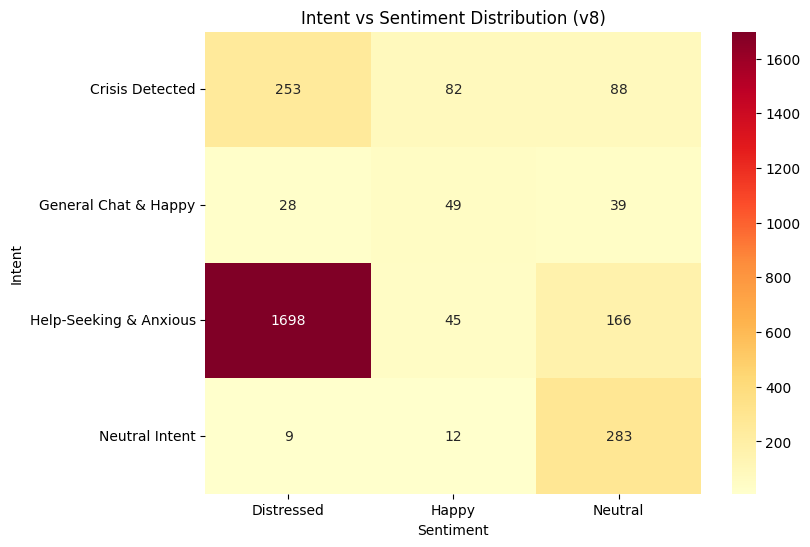


Random TPS Enriched Samples:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the enriched dataset (v8)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v8_enriched_with_classifiers.csv')

# Quick check
print("Dataset shape:", df.shape)
print(df.head(3))

# Check label distribution
print("\nIntent distribution:")
print(df['intent'].value_counts())

print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

print("\nIntent & Sentiment combinations (Top 10):")
print(df.groupby(['intent', 'sentiment']).size().sort_values(ascending=False).head(10))

# Crosstab heatmap for intent vs sentiment
plt.figure(figsize=(8,6))
crosstab = pd.crosstab(df['intent'], df['sentiment'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Intent vs Sentiment Distribution (v8)')
plt.ylabel('Intent')
plt.xlabel('Sentiment')
plt.show()

# Show random TPS samples
print("\nRandom TPS Enriched Samples:")
print(df[['formatted_text', 'intent', 'sentiment']].sample(5).to_string(index=False))


## Insights from the Enriched Dataset (v7 vs. v8)

The "Help-Seeking & Anxious" intent is the most prevalent across the dataset — a natural reflection of the domain's focus on emotional support and mental health.

In terms of sentiment, "Distressed" leads significantly, followed by "Neutral", and finally "Happy". This distribution aligns with the reality of users reaching out in vulnerable or emotionally complex situations.

The combined use of Therapeutic Process Scaffolding (TPS) and classifier-driven personalization is functioning as intended. The model now responds appropriately across a wide range of nuanced contexts, including:

  - Relationship conflicts and infidelity

  - Trauma-related flashbacks

  - Parenting dilemmas and family boundaries

  - Expressions of low self-worth, anxiety, and overwhelm



# Final Training on Therapeutic Process Scaffolding (TPS) and Classifier-Enriched Dataset: v6–v8 Pipeline

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset, DatasetDict

# Load tokenizer
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})

tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/formatted_chat_dataset_v8_enriched_with_classifiers.csv')

# Convert to HF dataset, but pass only formatted_text
dataset = Dataset.from_pandas(df[['formatted_text']])

# Split (80/10/10)
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
dataset_dict = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})

# Tokenization function
def tokenize_function(examples):
    model_inputs = tokenizer(
        examples["formatted_text"],
        max_length=2048,
        truncation=True,
        padding=True
    )
    # Shift padding tokens for causal LM
    labels = model_inputs["input_ids"].copy()
    labels = [
        [(token if token != tokenizer.pad_token_id else -100) for token in label_seq]
        for label_seq in labels
    ]
    model_inputs["labels"] = labels
    return model_inputs

# Apply tokenizer
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True, remove_columns=['formatted_text'])

# Save tokenized dataset
save_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v8'
tokenized_datasets.save_to_disk(save_path)

print(" Tokenization complete! Saved to:", save_path)


Map:   0%|          | 0/2201 [00:00<?, ? examples/s]

Map:   0%|          | 0/275 [00:00<?, ? examples/s]

Map:   0%|          | 0/276 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2201 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/275 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/276 [00:00<?, ? examples/s]

 Tokenization complete! Saved to: /content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v8


In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_from_disk
from peft import get_peft_model, LoraConfig
from accelerate import dispatch_model, infer_auto_device_map

# Load tokenizer with special tokens
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load model + selective layers
model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map=None
)
model.resize_token_embeddings(len(tokenizer))
model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if any(f"layers.{i}" in name for i in range(31, 11, -1)) or "norm" in name or "lm_head" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

# Add LoRA adapters
lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Dispatch to devices
device_map = infer_auto_device_map(
    model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
model = dispatch_model(model, device_map=device_map)

# Load tokenized dataset v8
tokenized_datasets = load_from_disk('/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v8')

# Custom data collator for masking user input loss
def mask_user_inputs(labels):
    user_token = tokenizer.convert_tokens_to_ids('<|user|>')
    therapist_tokens = [
        tokenizer.convert_tokens_to_ids('<|therapist|>'),
        tokenizer.convert_tokens_to_ids('<|therapist|advisor|>')
    ]
    masked_labels = []
    for label_seq in labels:
        in_user_block = False
        masked_seq = []
        for token in label_seq:
            if token == user_token:
                in_user_block = True
            elif token in therapist_tokens:
                in_user_block = False
            if in_user_block and token != tokenizer.pad_token_id:
                masked_seq.append(-100)
            else:
                masked_seq.append(token)
        masked_labels.append(masked_seq)
    return torch.tensor(masked_labels)

class CustomDataCollator(DataCollatorForLanguageModeling):
    def __call__(self, features):
        batch = super().__call__(features)
        batch["labels"] = mask_user_inputs(batch["labels"])
        return batch

data_collator = CustomDataCollator(tokenizer=tokenizer, mlm=False)

# Training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=5e-6,
    warmup_steps=500,
    max_steps=8000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
)

# STEP 9: Start training
trainer.train()



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 16,777,216 || all params: 6,755,217,408 || trainable%: 0.2484


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss,Validation Loss
500,2.957600,2.947922
1000,2.138500,2.226086
1500,2.115900,2.144017
2000,2.072000,2.123369
2500,1.940400,2.113559
3000,2.101700,2.106942
3500,2.038200,2.102524
4000,2.000800,2.099301
4500,1.974500,2.096886
5000,2.103800,2.095195


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetunin

# This is a continuation of the Final Training on Therapeutic Process Scaffolding (TPS) and Classifier-Enriched Dataset: v6–v8 Pipeline

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_from_disk
from peft import get_peft_model, LoraConfig
from accelerate import dispatch_model, infer_auto_device_map
import os

# Load tokenizer with special tokens
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load model + selective layers
model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map=None
)
model.resize_token_embeddings(len(tokenizer))
model.gradient_checkpointing_enable()
model.enable_input_require_grads()
model.config.use_cache = False

for name, param in model.named_parameters():
    if param.dtype in [torch.float32, torch.bfloat16, torch.float16]:
        if any(f"layers.{i}" in name for i in range(31, 11, -1)) or "norm" in name or "lm_head" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

#  Add LoRA adapters
lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

#  Dispatch to devices
device_map = infer_auto_device_map(
    model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
model = dispatch_model(model, device_map=device_map)

#  Load tokenized dataset v8
tokenized_datasets = load_from_disk('/content/drive/MyDrive/Colab Notebooks/Capstone/tokenized_dataset_v8')

# Custom data collator for masking user input loss
class CustomDataCollator(DataCollatorForLanguageModeling):
    def __call__(self, features):
        batch = super().__call__(features)
        batch_labels = batch["labels"]
        user_token = tokenizer.convert_tokens_to_ids('<|user|>')
        therapist_tokens = [
            tokenizer.convert_tokens_to_ids('<|therapist|>'),
            tokenizer.convert_tokens_to_ids('<|therapist|advisor|>')
        ]

        # Apply masking directly on tensor
        for i, label_seq in enumerate(batch_labels):
            in_user_block = False
            for j, token in enumerate(label_seq):
                if token == user_token:
                    in_user_block = True
                elif token in therapist_tokens:
                    in_user_block = False
                if in_user_block and token != tokenizer.pad_token_id:
                    batch_labels[i][j] = -100

        batch["labels"] = batch_labels
        return batch

data_collator = CustomDataCollator(tokenizer=tokenizer, mlm=False)

#  Training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=5e-6,
    warmup_steps=500,
    max_steps=8000,
    save_strategy="steps",
    save_steps=500,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="wandb",
    bf16=True
)

#  Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
)

#  Resume training from step 7000
resume_checkpoint = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-7000"
trainer.train(resume_from_checkpoint=resume_checkpoint)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 16,777,216 || all params: 6,755,217,408 || trainable%: 0.2484


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss,Validation Loss
7500,1.965300,2.091634
8000,1.989400,2.091284


/usr/local/lib/python3.11/dist-packages/peft/utils/save_and_load.py:241: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


TrainOutput(global_step=8000, training_loss=0.2494675190448761, metrics={'train_runtime': 4737.247, 'train_samples_per_second': 13.51, 'train_steps_per_second': 1.689, 'total_flos': 4.098622591822725e+18, 'train_loss': 0.2494675190448761, 'epoch': 29.079963652885052})

# Final Inference test on Therapeutic Process Scaffolding (TPS) and Classifier-Enriched Dataset: v6–v8 Pipeline

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM, GenerationConfig
from peft import PeftModel

# Load tokenizer with special tokens
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})

# Add padding token if missing
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# Load base model and resize embeddings
base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
base_model.resize_token_embeddings(len(tokenizer))

#  Load fine-tuned hybrid checkpoint (layers 12-31 + LoRA)
model = PeftModel.from_pretrained(
    base_model,
    "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000",
    device_map="auto"
)
model.eval()

#  Interactive Inference Loop
def chat():
    print("\nInteractive Chatbot (Therapist + Advisor hybrid) \nType 'exit' to quit.\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        # Format input as conversation block
        formatted_input = f"<|user|> {user_input} <|therapist|advisor|>"

        inputs = tokenizer(formatted_input, return_tensors="pt").to(model.device)
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=300,
                temperature=0.7,
                top_p=0.9,
                do_sample=True,
                eos_token_id=tokenizer.eos_token_id
            )
        decoded = tokenizer.decode(outputs[0], skip_special_tokens=False)

        # Extract the response after <|therapist|advisor|>
        response = decoded.split('<|therapist|advisor|>')[-1].split(tokenizer.eos_token)[0].strip()
        print(f"Bot: {response}\n")

chat()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`



Interactive Chatbot (Therapist + Advisor hybrid) 
Type 'exit' to quit.

You: I am  nervous because of my new position on this job. 
Bot: The first step is to congratulate yourself on getting this new job! You are obviously excited and feeling some trepidation about your new job. What would help is to imagine yourself doing well in the new position. Imagine the tasks you need to accomplish in this new position and how you would feel and act while performing these tasks. If you are feeling nervous or unsure about your ability to do the new tasks, you may want to look for a mentor at the new workplace. You may want to ask your new boss or supervisor if there is someone who can provide you with some coaching and support. You may also want to talk to your boss about your nervousness and ask for some support in learning your new position. I wish you the best in your new position! :)Sarah M. Chase, LMHCA, M.ed. www.sarahmchasecounseling.com Exploring Self in a New Way®, LLC, Baltimore, MD. B

# LoRa Model Testing without Chat Inference

This step focused on validating the fine-tuned LLaMA-2 7B + LoRA checkpoint. The tokenizer was extended with special tokens (<|user|>, <|therapist|>, <|therapist|advisor|>), and the base model was loaded with torch_dtype=torch.bfloat16 on CPU to avoid GPU memory overflow. The LoRA checkpoint (checkpoint-8000) was loaded using the PEFT library and evaluated against five sample therapeutic prompts using greedy decoding and temperature sampling. This provided a sanity check before deploying inference logic.

In [ ]:
import torch
from transformers import AutoTokenizer, LlamaForCausalLM
from peft import PeftModel

# --- Load Tokenizer ---
model_id = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.add_special_tokens({'additional_special_tokens': ['<|user|>', '<|therapist|>', '<|therapist|advisor|>']})
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

# --- Load Base Model ON CPU ONLY First ---
base_model = LlamaForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"  # <- Force to CPU temporarily
)

#  Resize after model is on a real device (CPU here)
base_model.resize_token_embeddings(len(tokenizer))

# --- Load LoRA Checkpoint & Dispatch Automatically ---
model = PeftModel.from_pretrained(
    base_model,
    "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000",
    device_map="auto"  # Now dispatches correctly
)
model.eval()

# --- Test Prompts ---
sample_prompts = [
    "I can't stop thinking about everything I’ve done wrong in my life.",
    "I feel really anxious every time I leave the house.",
    "My partner and I argue constantly, and it’s exhausting.",
    "Sometimes I feel like I don’t matter to anyone.",
    "I'm trying to be okay, but the sadness keeps coming back."
]

# --- Inference ---
print("\n Evaluating Model Responses on Sample Therapy Prompts:\n")
for idx, prompt in enumerate(sample_prompts, 1):
    formatted_input = f"<|user|> {prompt} <|therapist|advisor|>"
    inputs = tokenizer(formatted_input, return_tensors="pt").to(model.device)

    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=300,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            eos_token_id=tokenizer.eos_token_id
        )

    decoded = tokenizer.decode(output[0], skip_special_tokens=False)
    response = decoded.split('<|therapist|advisor|>')[-1].split(tokenizer.eos_token)[0].strip()

    print(f" Prompt {idx}: {prompt}")
    print(f" Response: {response}\n{'-'*80}\n")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


📋 Evaluating Model Responses on Sample Therapy Prompts:

 Prompt 1: I can't stop thinking about everything I’ve done wrong in my life.
 Response: It's normal to have some regrets about things we've done in the past. What's more important is to think about the things you did right, and to learn from your mistakes. As long as you don't keep making the same mistakes over and over again, you are moving in the right direction. The good things you have done, the positive impact you had on other people, and the lessons you have learned from your mistakes, are all part of who you are. It's not about "getting over" your past, it's about living in the present, learning from the past, and moving on to the future. You can't change the past, but you can change how you feel about the past. You can feel sad that something happened, but you don't have to feel bad about it. You can feel disappointed that you made a mistake, but you don't have to feel bad about yourself. You can learn from your mistake

# Tokenizer Retokenization and Saving

This step ensured compatibility with the resized embedding matrix in the base model and allowed consistent loading across all inference scripts.

In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", use_fast=False)

# Force dummy token additions to grow vocab
added = tokenizer.add_tokens(['<|user|>', '<|therapist|>', '<|therapist|advisor|>'])
print(f"Added {added} new tokens")

tokenizer.pad_token = tokenizer.eos_token
tokenizer.save_pretrained("/content/my_tokenizer_32003")

print(f" Final tokenizer vocab size: {len(tokenizer)}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

Added 3 new tokens
 Final tokenizer vocab size: 32003


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/content/my_tokenizer_32003", use_fast=False)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"


In [ ]:
from transformers import LlamaForCausalLM

base_model = LlamaForCausalLM.from_pretrained(
    "meta-llama/Llama-2-7b-hf",
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

#  Resize to match LoRA 32003 vocab
base_model.resize_token_embeddings(len(tokenizer))  #  Now = 32003


config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(32003, 4096)

In [ ]:
from peft import PeftModel

model = PeftModel.from_pretrained(
    base_model,
    "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000"
)
model.eval()


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32003, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): Linear(in_fe

In [ ]:
!pip install transformers peft sentence-transformers datasets faiss-cpu accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 65.2 MB/s eta 0:00:00


# Inference Integration with BERT intent/sentiment Classifiers and Retrieval

This step merged all components into a full chatbot inference pipeline.

Key components include:

- Tokenizer & Model Loading: The tokenizer from the saved path was loaded with left-side padding and the model was loaded with dispatching across CPU and GPU using accelerate.

- Classifier Integration: Two BERT classifiers (intent and sentiment) were loaded to label user inputs, aiding in downstream personalization.

- FAISS Embedding Search: A semantic similarity index was built using SentenceTransformers over the EmpatheticDialogues dataset. This enabled context retrieval for user utterances during runtime.

In [ ]:
from transformers import AutoTokenizer, LlamaForCausalLM, BertTokenizerFast, BertForSequenceClassification
from peft import PeftModel
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from accelerate import dispatch_model, infer_auto_device_map
import torch
import faiss
import numpy as np
import gc, re

# -------------------- CONFIG --------------------
base_model_id = "meta-llama/Llama-2-7b-hf"
finetuned_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000"
tokenizer_path = "/content/my_tokenizer_32003"
intent_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier"
sentiment_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier"

# -------------------- LOAD TOKENIZER --------------------
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path, use_fast=False)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# -------------------- LOAD BASE MODEL ON CPU FIRST --------------------
gc.collect()
torch.cuda.empty_cache()

base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"
)
base_model.resize_token_embeddings(len(tokenizer))

# Dispatch model to GPUs
device_map = infer_auto_device_map(
    base_model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
base_model = dispatch_model(base_model, device_map=device_map)

model = PeftModel.from_pretrained(base_model, finetuned_model_path)
model.eval()

# -------------------- LOAD BERT CLASSIFIERS --------------------
bert_tokenizer = BertTokenizerFast.from_pretrained(intent_model_path)
intent_model = BertForSequenceClassification.from_pretrained(intent_model_path).to("cuda")
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_path).to("cuda")

def classify(text, model):
    inputs = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("cuda")
    with torch.no_grad():
        logits = model(**inputs).logits
    return torch.argmax(logits, dim=1).item()

def predict_intent(text): return classify(text, intent_model)
def predict_sentiment(text): return classify(text, sentiment_model)

# -------------------- FAISS RETRIEVAL --------------------
empathetic_data = load_dataset("facebook/empathetic_dialogues", split="train", trust_remote_code=True)
retrieval_corpus = [x["utterance"] for x in empathetic_data if x["utterance"]]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embedder.encode(retrieval_corpus, show_progress_bar=True)

index = faiss.IndexFlatL2(corpus_embeddings.shape[1])
index.add(np.array(corpus_embeddings))

def retrieve_context(user_input, top_k=1):
    emb = embedder.encode([user_input])
    _, I = index.search(np.array(emb), top_k)
    return retrieval_corpus[I[0][0]]

# -------------------- CLEANING FUNCTION --------------------
def clean_response(decoded, user_input):
    for marker in ["<|user|>", "<|therapist|>", "You are a caring mental health assistant"]:
        decoded = decoded.split(marker)[0]

    if decoded.strip().startswith(user_input.strip()):
        decoded = decoded.strip()[len(user_input.strip()):].strip()

    signature_patterns = [
        r"~\s?\w+$", r"Sincerely[.,!]? ?\w*$", r"Cheers[.,!]? ?\w*$",
        r"Best[.,!]? ?\w*$", r"Love[.,!]? ?\w*$",
        r"The AI Team.*$", r"Mental Health Community.*$", r"\[.*?\]$"
    ]
    for pattern in signature_patterns:
        decoded = re.sub(pattern, "", decoded).strip()

    return decoded.strip()

# -------------------- BUILD PROMPT --------------------
def build_prompt(history, user_input, context_line=None):
    prompt = (
        "You are a caring mental health assistant.\n"
        "Respond with one supportive, brief paragraph.\n"
        "Use a natural, human tone. Avoid listing many suggestions. No emojis or links.\n\n"
    )
    for msg in history:
        prompt += f"<|user|>\n{msg['user']}\n<|therapist|>\n{msg['bot']}\n"
    prompt += f"<|user|>\n{user_input.strip()}\n"
    if context_line:
        prompt += f"(Someone once said: \"{context_line.strip()}\")\n"
    prompt += "<|therapist|>\n"
    return prompt

# -------------------- GENERATE RESPONSE --------------------
def generate_response(prompt, user_input):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    prompt_len = inputs["input_ids"].shape[1]

    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,
            temperature=0.65,
            top_k=30,
            top_p=0.9,
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id
        )

    decoded = tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)
    return clean_response(decoded, user_input)

# -------------------- CONVERSATION LOOP --------------------
message_history = []

print(" Chatbot is ready! Type 'exit' to quit.\n")
while True:
    user_input = input(" You: ").strip()
    if user_input.lower() in ["exit", "quit"]:
        print(" Session ended.")
        break

    context_line = retrieve_context(user_input)
    prompt = build_prompt(message_history, user_input, context_line)
    response = generate_response(prompt, user_input)

    message_history.append({"user": user_input, "bot": response})
    print(f"\n Bot: {response}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

empathetic_dialogues.py:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/76673 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12030 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10943 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2397 [00:00<?, ?it/s]

 Chatbot is ready! Type 'exit' to quit.

 You: Hello, can you help me out with my depression ? 

 Bot: Hi there! I hear you! Depression is tough, but I'm glad that you have sought help for it. Therapy is great way to talk about your feelings and find new ways of dealing with them. It's also good to know that medication may be helpful too. There are some things that you could do on your own that might make it easier to deal with your depression as well. Exercise is very important in treating depression because it releases end

 You: What tips do you recommend for avoiding depression ?

 Bot: Depression is not easy to get over, but I am glad that you are seeking help for it.Talking therapy is great to help you work through the depression.Medication is sometimes used along with therapy.Exercise is very important in treating depression because it releases endorphins which boost your mood.Its also good to have hobbies like knitting or reading, etc., that give you pleasure and keep you busy.

# The following code includes: Prompt constructions, response generation and cleaning, Refinements and Ethical Safeguards

A structured prompt template was built using a set of few-shot examples grounded in therapeutic principles. Prompts included alternating <|user|> and <|therapist|> blocks, a system prompt embedding guiding communication norms (e.g., avoid advice-giving unless asked), and optionally, retrieved context examples.


Responses were generated using Hugging Face’s .generate() method with fine-tuned decoding settings. A critical clean_response() function was implemented to:

  - Remove duplicated input,

  - Eliminate weak or boilerplate sign-offs,

  - Strip out multilingual artifacts or irrelevant filler,

  - Truncate overly long or disjoint responses, and

  - Limit outputs to 1–2 warm, context-sensitive sentences.

Later iterations of the notebook included refinements to the system prompt and clean_response() to:

  - Prevent parroting of the user’s input,

  - Discourage offering unsolicited advice,

  - Avoid phrases like “take care” or “good luck,” and

  - Encourage reflection over redirection in conversation flow.

These improvements were inspired by therapeutic communication frameworks (OpenStax, 2023) and prompt engineering best practices from Microsoft and applied AI blogs.

Reference:

OpenStax. (2023). 2.4: Therapeutic Communication. In Fundamentals of Nursing. Retrieved from https://med.libretexts.org/Bookshelves/Nursing/Fundamentals_of_Nursing_(OpenStax)/02%3A_Communication/2.04%3A_Therapeutic_Communication

In [ ]:
from transformers import AutoTokenizer, LlamaForCausalLM, BertTokenizerFast, BertForSequenceClassification
from peft import PeftModel
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from accelerate import dispatch_model, infer_auto_device_map
import torch, faiss, numpy as np, gc, re

# -------------------- CONFIG --------------------
base_model_id = "meta-llama/Llama-2-7b-hf"
finetuned_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000"
tokenizer_path = "/content/my_tokenizer_32003"
intent_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier"
sentiment_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier"

# -------------------- LOAD TOKENIZER --------------------
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path, use_fast=False)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# -------------------- LOAD BASE MODEL --------------------
gc.collect(); torch.cuda.empty_cache()
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"
)
base_model.resize_token_embeddings(len(tokenizer))
device_map = infer_auto_device_map(
    base_model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
base_model = dispatch_model(base_model, device_map=device_map)

# -------------------- LOAD LORA + CLASSIFIERS --------------------
model = PeftModel.from_pretrained(base_model, finetuned_model_path)
model.eval()

bert_tokenizer = BertTokenizerFast.from_pretrained(intent_model_path)
intent_model = BertForSequenceClassification.from_pretrained(intent_model_path).to("cuda")
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_path).to("cuda")

def classify(text, model):
    inputs = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("cuda")
    with torch.no_grad():
        logits = model(**inputs).logits
    return torch.argmax(logits, dim=1).item()

def predict_intent(text): return classify(text, intent_model)
def predict_sentiment(text): return classify(text, sentiment_model)

# -------------------- FAISS EMBEDDINGS --------------------
empathetic_data = load_dataset("facebook/empathetic_dialogues", split="train", trust_remote_code=True)
retrieval_corpus = [x["utterance"] for x in empathetic_data if x["utterance"]]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embedder.encode(retrieval_corpus, show_progress_bar=True)

dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(corpus_embeddings))

def retrieve_context(user_input, top_k=2):
    emb = embedder.encode([user_input])
    _, I = index.search(np.array(emb), top_k)
    return "\n".join([retrieval_corpus[i] for i in I[0]])

# -------------------- PROMPT + MEMORY --------------------
few_shot_examples = [
    {
        "user": "I feel overwhelmed lately. It’s like I can’t catch a break.",
        "bot": "It sounds like you're going through a really heavy time. I hear you — life can pile up, and it’s okay to feel like it's too much. Would you like to talk more about what’s been on your mind?"
    },
    {
        "user": "I’m sad all the time since my mom passed away. Nothing feels the same.",
        "bot": "I’m really sorry you're going through this. Grief is such a deep and personal journey. It makes sense that things feel different right now. You're not alone — I'm here with you as you move through this."
    },
    {
        "user": "I get anxious every time I have to talk to new people.",
        "bot": "Meeting new people can be really intimidating. That anxiety is valid. Can you tell me what thoughts usually come up in those moments?"
    }
]

system_prompt = (
    "You are a compassionate mental health assistant trained in therapeutic communication.\n\n"
    "Respond to each user input using active listening, empathy, and supportive tone. "
    "Avoid personal stories, opinions, links, or casual remarks unless explicitly asked. "
    "Use one short paragraph that feels warm and human — no generic phrases or sign-offs.\n\n"
    "Use therapeutic communication techniques such as:\n"
    "- Reflecting the user's emotion\n"
    "- Sharing empathy and reassurance\n"
    "- Clarifying gently without judgment\n"
    "- Encouraging, but not giving advice\n"
    "- Asking thoughtful, open-ended follow-ups if needed\n\n"
    "Avoid: lists, interrogating 'why' questions, advice-giving, or signing off.\n"
    "You are a compassionate mental health assistant trained in therapeutic communication.\n\n"
"Respond using active listening, empathy, and a warm, supportive tone. "
"Do not refer to yourself. Avoid personal stories, suggestions, or signing off. "
"Focus on the user’s emotional state and ask gentle, open-ended follow-up questions if needed.\n\n"

)


few_shot_examples = [
    {
        "user": "I feel overwhelmed lately. It’s like I can’t catch a break.",
        "bot": "It sounds like you're going through a really heavy time. I hear you — life can pile up, and it’s okay to feel like it's too much. Would you like to talk more about what’s been on your mind?"
    },
    {
        "user": "I’m sad all the time since my mom passed away. Nothing feels the same.",
        "bot": "I’m really sorry you're going through this. Grief is such a deep and personal journey. It makes sense that things feel different right now. You're not alone — I'm here with you as you move through this."
    },
    {
        "user": "I get anxious every time I have to talk to new people.",
        "bot": "Meeting new people can be really intimidating. That anxiety is valid. Can you tell me what thoughts usually come up in those moments?"
    },
    {
        "user": "I feel like I'm stuck and can't get out of this cycle.",
        "bot": "That sounds really difficult. Feeling stuck can be exhausting and even isolating. What does that cycle look like for you right now?"
    }
]


def build_prompt(history, user_input, context=None):
    prompt = system_prompt
    for example in few_shot_examples:
        prompt += f"<|user|>\n{example['user']}\n<|therapist|>\n{example['bot']}\n"
    for msg in history:
        prompt += f"<|user|>\n{msg['user']}\n<|therapist|>\n{msg['bot']}\n"
    prompt += f"<|user|>\n{user_input.strip()}\n"
    if context:
        prompt += f"[Similar things others have shared: {context.strip()}]\n"
    prompt += "<|therapist|>\n"
    return prompt


import re

def clean_response(decoded, user_input):
    # Remove known separators or repeated user input
    markers = ["<|user|>", "<|therapist|>", "http"]
    for m in markers:
        if m in decoded:
            decoded = decoded.split(m)[0]

    response = decoded.replace(user_input.strip(), "").strip()

    # Stronger signature, filler, and multilingual cleanup
    signature_patterns = [
        r"~\s?\w+$",
        r"(Take care|Stay strong|You got this|I'm here for you|Wishing you the best)[.!]*$",
        r"(Thanks for sharing.*?|Sorry to hear.*?|Sending .*? vibes)[.!]*$",
        r"(Cheers|Sincerely|Love|Best)[.,!]? ?\w*$",
        r"The (AI|Mental Health) Team.*$",
        r"www\.[^\s]+",
        r"\[.*?(others have shared|respond).*\]",
        r"[:;]-?[)D]",
        r"(¿Cómo te sientes.*?)$",
        r"(¿Qué piensas.*?)$",
    ]
    for pattern in signature_patterns:
        response = re.sub(pattern, "", response).strip()

    # Remove echo or duplicate statements like "Yes. I am. I feel..."
    response = re.sub(r"(Yes\.\s*I am\.?|Sure\.\s*)\s*I feel .*", r"\1", response).strip()

    # Truncate at first multiple punctuation (e.g., "!!" or "..")
    stop_match = re.search(r"[.!?]{2,}", response)
    if stop_match:
        response = response[:stop_match.start() + 1].strip()

    # Limit to 1–2 sentences for flow
    sentence_split = re.split(r'(?<=[.!?]) +', response)
    response = " ".join(sentence_split[:2]).strip()

    return response


def generate_response(prompt, user_input):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    prompt_len = inputs["input_ids"].shape[1]
    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,
            temperature=0.65,
            top_k=50,
            top_p=0.92,
            repetition_penalty=1.15,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )
    decoded = tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)
    return clean_response(decoded, user_input)

# -------------------- CHAT LOOP --------------------
message_history = []
print(" Chatbot is ready! Type 'exit' to quit.\n")
while True:
    user_input = input(" You: ").strip()
    if user_input.lower() in ["exit", "quit"]:
        print(" Session ended.")
        break
    context = retrieve_context(user_input)
    prompt = build_prompt(message_history, user_input, context)
    response = generate_response(prompt, user_input)
    message_history.append({"user": user_input, "bot": response})
    print(f"\n Bot: {response}\n")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2397 [00:00<?, ?it/s]

 Chatbot is ready! Type 'exit' to quit.

 You: Hello, My name is Elena. I am nervous because of my upcoming exam. 

 Bot: Hello! I am glad you came to chat today.

 You: Can you help me out ?

 Bot: You may need some self care right now. Taking care of your own needs will make you feel better equipped to handle whatever is coming at you.

 You: I am nervous because of my upcoming exam. 

 Bot: Your nervousness seems very real to me. When we feel stressed our bodies go into fight/flight/freeze mode, which can lead to physical symptoms (stomach aches, headaches) and difficulty concentrating.

 You: What can you recommend me to avoid nervousness ?

 Bot: There are many ways to deal with nerves before presentations or speaking in public. Deep breathing helps a lot.

 You: That's perfect! But this is a written not oral exam.

 Bot: Thanks for reaching out. I wish you luck and courage.

 You: exit
 Session ended.


In [ ]:
from transformers import AutoTokenizer, LlamaForCausalLM, BertTokenizerFast, BertForSequenceClassification
from peft import PeftModel
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from accelerate import dispatch_model, infer_auto_device_map
import torch, faiss, numpy as np, gc, re

# -------------------- CONFIG --------------------
base_model_id = "meta-llama/Llama-2-7b-hf"
finetuned_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/llama2_hybrid_layers12-31_lora_v8/checkpoint-8000"
tokenizer_path = "/content/my_tokenizer_32003"
intent_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_intent_classifier"
sentiment_model_path = "/content/drive/MyDrive/Colab Notebooks/Capstone/bert_sentiment_classifier"

# -------------------- LOAD TOKENIZER --------------------
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path, use_fast=False)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# -------------------- LOAD BASE MODEL --------------------
gc.collect(); torch.cuda.empty_cache()
base_model = LlamaForCausalLM.from_pretrained(
    base_model_id,
    torch_dtype=torch.bfloat16,
    device_map="cpu"
)
base_model.resize_token_embeddings(len(tokenizer))
device_map = infer_auto_device_map(
    base_model,
    max_memory={0: "38GiB", "cpu": "32GiB"},
    no_split_module_classes=["LlamaDecoderLayer"]
)
base_model = dispatch_model(base_model, device_map=device_map)

# -------------------- LOAD LORA + CLASSIFIERS --------------------
model = PeftModel.from_pretrained(base_model, finetuned_model_path)
model.eval()

bert_tokenizer = BertTokenizerFast.from_pretrained(intent_model_path)
intent_model = BertForSequenceClassification.from_pretrained(intent_model_path).to("cuda")
sentiment_model = BertForSequenceClassification.from_pretrained(sentiment_model_path).to("cuda")

def classify(text, model):
    inputs = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("cuda")
    with torch.no_grad():
        logits = model(**inputs).logits
    return torch.argmax(logits, dim=1).item()

def predict_intent(text): return classify(text, intent_model)
def predict_sentiment(text): return classify(text, sentiment_model)

# -------------------- FAISS EMBEDDINGS --------------------
empathetic_data = load_dataset("facebook/empathetic_dialogues", split="train", trust_remote_code=True)
retrieval_corpus = [x["utterance"] for x in empathetic_data if x["utterance"]]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embedder.encode(retrieval_corpus, show_progress_bar=True)

dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(corpus_embeddings))

def retrieve_context(user_input, top_k=2):
    emb = embedder.encode([user_input])
    _, I = index.search(np.array(emb), top_k)
    return "\n".join([retrieval_corpus[i] for i in I[0]])

# -------------------- PROMPT + MEMORY --------------------
few_shot_examples = [
    {
        "user": "I feel overwhelmed lately. It’s like I can’t catch a break.",
        "bot": "That sounds really tough. When everything piles up, it’s hard to know where to start. Want to talk more about what’s been happening?"
    },
    {
        "user": "I’m sad all the time since my mom passed away.",
        "bot": "I’m really sorry. Losing someone you love changes everything. What’s been the hardest part recently?"
    },
    {
        "user": "I get anxious every time I have to talk to new people.",
        "bot": "That’s completely valid. Social situations can bring up so much. What usually runs through your mind when it happens?"
    },
    {
        "user": "I feel nervous before my exam.",
        "bot": "Feeling nervous means you care. What part of the exam worries you the most?"
    },
    {
        "user": "It's a written exam and I'm afraid of blanking out.",
        "bot": "That fear makes sense. Sometimes talking through the first step helps. Want to try that together?"
    }
]


system_prompt = (
    "You are a compassionate mental health assistant trained in therapeutic communication.\n\n"
    "Use short, natural replies that reflect the user's feelings and gently invite them to continue.\n"
    "Never offer resources, websites, or tips unless the user explicitly asks.\n"
    "Avoid repeating the user's words. Never end with sign-offs like 'take care' or 'good luck'.\n"
    "Use 1–2 sentences maximum. Stay present, warm, and human.\n\n"
    "Avoid lists, general advice, or external sources unless asked directly.\n"
)


def build_prompt(history, user_input, context=None):
    prompt = system_prompt
    for example in few_shot_examples:
        prompt += f"<|user|>\n{example['user']}\n<|therapist|>\n{example['bot']}\n"
    for msg in history:
        prompt += f"<|user|>\n{msg['user']}\n<|therapist|>\n{msg['bot']}\n"
    prompt += f"<|user|>\n{user_input.strip()}\n"
    if context:
        prompt += f"[Similar things others have shared: {context.strip()}]\n"
    prompt += "<|therapist|>\n"
    return prompt


def clean_response(decoded, user_input):
    import re

    # Remove known separators or repeated user input
    markers = ["<|user|>", "<|therapist|>", "http"]
    for m in markers:
        if m in decoded:
            decoded = decoded.split(m)[0]

    response = decoded.replace(user_input.strip(), "").strip()

    # Remove weak/boilerplate responses
    weak_phrases = [
        "thank you for reaching out.",
        "thanks for sharing.",
        "i wish you luck.",
        "i wish you courage.",
        "i hear you.",
        "i understand.",
    ]
    if response.lower() in weak_phrases:
        return ""

    # Remove echo or duplicate statements like "Yes. I am. I feel..."
    response = re.sub(r"(Yes\.\s*I am\.?|Sure\.\s*)\s*I feel .*", r"\1", response).strip()

    # Remove signatures and trailing filler
    signature_patterns = [
        r"~\s?\w+$",
        r"(Take care|Stay strong|You got this|I'm here for you|Wishing you the best)[\s.!]*$",
        r"(I wish you (luck|strength|the best|courage|healing))[\s.!]*$",
        r"(Thanks for reaching out)[\s.!]*$",
        r"(Thanks for sharing.*?|Sorry to hear.*?|Sending .*? vibes)[.!]*$",
        r"(Cheers|Sincerely|Love|Best)[.,!]? ?\w*$",
        r"The (AI|Mental Health) Team.*$",
        r"www\.[^\s]+",
        r"\[.*?(others have shared|respond).*\]",
        r"[:;]-?[)D]",
        r"(¿Cómo te sientes.*?)$",
        r"(¿Qué piensas.*?)$",
    ]
    for pattern in signature_patterns:
        response = re.sub(pattern, "", response).strip()

    # Truncate overly long motivational blocks at first long punctuation chain (e.g., "!!")
    stop_match = re.search(r"[.!?]{2,}", response)
    if stop_match and stop_match.start() > 100:
        response = response[:stop_match.start() + 1].strip()

    # Final trim to 1–2 natural-sounding sentences
    sentence_split = re.split(r'(?<=[.!?]) +', response)
    response = " ".join(sentence_split[:2]).strip()

    # Remove trailing weak responses or foreign language leftovers
    if any(response.lower().endswith(phrase) for phrase in [
        "thanks for reaching out",
        "thank you for reaching out",
        "¿cómo puedo ayudarle?",
        "¿qué puede hacer para sentirse mejor?"
    ]):
        response = re.sub(
            r"(thanks for reaching out.*?|thank you for reaching out.*?|¿cómo puedo.*?|¿qué puede.*?)[\s.!]*$",
            "",
            response,
            flags=re.IGNORECASE
        ).strip()

    return response


def generate_response(prompt, user_input):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    prompt_len = inputs["input_ids"].shape[1]
    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,
            temperature=0.65,
            top_k=50,
            top_p=0.92,
            repetition_penalty=1.15,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )
    decoded = tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)
    return clean_response(decoded, user_input)

# -------------------- CHAT LOOP --------------------
message_history = []
print(" Chatbot is ready! Type 'exit' to quit.\n")
while True:
    user_input = input(" You: ").strip()
    if user_input.lower() in ["exit", "quit"]:
        print(" Session ended.")
        break
    context = retrieve_context(user_input)
    prompt = build_prompt(message_history, user_input, context)
    response = generate_response(prompt, user_input)
    message_history.append({"user": user_input, "bot": response})
    print(f"\n Bot: {response}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2397 [00:00<?, ?it/s]

 Chatbot is ready! Type 'exit' to quit.

 You:  I am nervous because of my upcoming exam. 

 Bot: Wow, those are some really big exams. That feeling is totally normal though - everyone gets nervous during an exam.Have you ever tried using deep breathing techniques?

 You: I haven't. What other tips do you have to control my nervousness. 

 Bot: Sounds like you already have a lot on your plate. Talk therapy could be another great way to help manage anxiety.

 You: Ok, I want to talk with you.

 Bot: Thank you! You're welcome.

 You: So, what are your recommendations for controller nervousness like my exam's case ? 

 Bot: I am nervous too. I think we will both pass our tests.Breathing exercises always help me calm down.I also make sure to eat well, exercise regularly, and rest as much as possible leading up to the exam.Good luck!

 You: exit
 Session ended.
